In [3]:
import pandas as pd

In [24]:
df=pd.read_excel('/config/workspace/sample.xlsx')

In [25]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

In [26]:
df

,Date,Days
0,2000-04-01,215.0
1,2000-04-02,150.0
2,2000-04-03,207.0
3,2000-04-04,161.0
4,2000-04-05,167.0
...,...,...
360,2001-03-27,NaN
361,2001-03-28,NaN
362,2001-03-29,NaN
363,2001-03-30,NaN


In [19]:
df['value_filled'] = df['Days'].rolling(window=60, min_periods=1).mean()

In [27]:
pip install pandas statsmodels


     |████████████████████████████████| 10.2 MB 20.7 MB/s eta 0:00:01�██████▋             | 5.9 MB 20.7 MB/s eta 0:00:01�█████████████▎     | 8.3 MB 20.7 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 38.5 MB/s eta 0:00:01
     |████████████████████████████████| 34.5 MB 38 kB/s s eta 0:00:01                   | 5.5 MB 37.4 MB/s eta 0:00:01��█████▎                        | 7.8 MB 37.4 MB/s eta 0:00:01��█▍                 | 15.5 MB 37.4 MB/s eta 0:00:01     |█████████████████▌              | 18.9 MB 37.4 MB/s eta 0:00:01��████▍            | 21.0 MB 37.4 MB/s eta 0:00:01��██▌          | 23.2 MB 37.4 MB/s eta 0:00:01██████████████▍    | 29.6 MB 37.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create SARIMA model
model = SARIMAX(df['Days'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the model
results = model.fit()


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77106D+00    |proj g|=  3.89875D-02

At iterate    5    f=  2.74891D+00    |proj g|=  6.50208D-03

At iterate   10    f=  2.69241D+00    |proj g|=  1.03845D-01

At iterate   15    f=  2.67917D+00    |proj g|=  1.11237D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     20      1     0     0   1.116D-05   2.679D+00
  F =   2.6791743676767990     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [31]:
# Specify the date range for missing values
missing_date_range = pd.date_range('2000-09-01', '2001-03-31')

# Predict missing values
forecast = results.get_forecast(steps=len(missing_date_range))


In [32]:
predictions = forecast.predicted_mean
conf_int = forecast.conf_int()

In [33]:
predictions_df = pd.DataFrame({
    'Date': missing_date_range,
    'value_filled': predictions,
    'lower_bound': conf_int.iloc[:, 0],
    'upper_bound': conf_int.iloc[:, 1]
})

In [34]:
df = pd.merge(df, predictions_df, how='left', on='Date')

In [35]:
df['value_filled'] = df['value_filled'].combine_first(df['Days'])

In [37]:
print(df[['Date', 'Days', 'value_filled', 'lower_bound', 'upper_bound']])

          Date   Days  value_filled  lower_bound  upper_bound
0   2000-04-01  215.0    215.000000          NaN          NaN
1   2000-04-02  150.0    150.000000          NaN          NaN
2   2000-04-03  207.0    207.000000          NaN          NaN
3   2000-04-04  161.0    161.000000          NaN          NaN
4   2000-04-05  167.0    167.000000          NaN          NaN
..         ...    ...           ...          ...          ...
360 2001-03-27    NaN    218.404056   156.563166   280.244946
361 2001-03-28    NaN    215.729182   153.887820   277.570543
362 2001-03-29    NaN    215.109872   153.058997   277.160747
363 2001-03-30    NaN    213.065694   151.044115   275.087274
364 2001-03-31    NaN    219.075285   156.986133   281.164437

[365 rows x 5 columns]


In [17]:
df

,ds,y
0,2000-04-01,215.0
1,2000-04-02,150.0
2,2000-04-03,207.0
3,2000-04-04,161.0
4,2000-04-05,167.0
...,...,...
360,2001-03-27,NaN
361,2001-03-28,NaN
362,2001-03-29,NaN
363,2001-03-30,NaN


In [39]:
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [40]:
pip install matplotlib

     |████████████████████████████████| 9.2 MB 12.5 MB/s eta 0:00:01 0:00:01[K     |██████████████████████████▎     | 7.6 MB 12.5 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 44.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 35.6 MB/s eta 0:00:01
     |████████████████████████████████| 4.6 MB 34.2 MB/s eta 0:00:01     |███                             | 440 kB 34.2 MB/s eta 0:00:01██████████████████▋           | 3.0 MB 34.2 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 43.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 35.5 MB/s eta 0:00:01██████▊             | 2.0 MB 35.5 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [41]:
import matplotlib.pyplot as plt

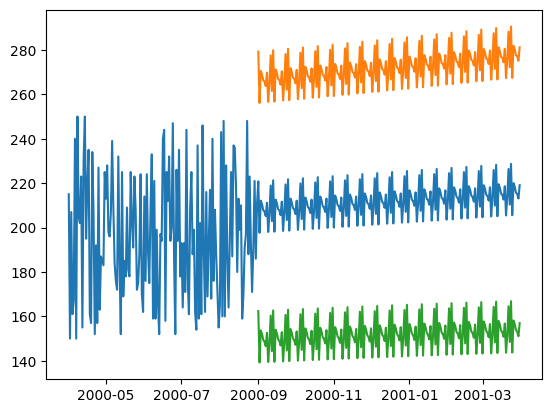

In [46]:
#plt.plot(df['Date'], df['Days'], label='Actual')
plt.plot(df['Date'], df['value_filled'], label='Predicted')
plt.plot(df['Date'], df['upper_bound'], label='Upper')
plt.plot(df['Date'], df['lower_bound'], label='Lower')





In [77]:
df=pd.read_excel('/config/workspace/sample.xlsx')

In [48]:
pip install pandas scikit-learn


     |████████████████████████████████| 11.1 MB 13.7 MB/s eta 0:00:01██████████▊              | 6.1 MB 13.7 MB/s eta 0:00:01████████████▌       | 8.5 MB 13.7 MB/s eta 0:00:01     |█████████████████████████████▌  | 10.2 MB 13.7 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 37.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [78]:
# Convert 'date' to datetime and sort by date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')


In [79]:
df

,Date,Days
0,2000-04-01,215.0
1,2000-04-02,150.0
2,2000-04-03,207.0
3,2000-04-04,161.0
4,2000-04-05,167.0
...,...,...
360,2001-03-27,NaN
361,2001-03-28,NaN
362,2001-03-29,NaN
363,2001-03-30,NaN


In [80]:
df['moving_average'] = df['Days'].rolling(window=60).mean()

In [81]:
df['residuals'] = df['Days'] - df['moving_average']

In [82]:
from statsmodels.tsa.arima.model import ARIMA

In [83]:
model = ARIMA(df['residuals'], order=(1, 1, 1))  # Adjust order as needed
results = model.fit()

In [84]:
predicted_residuals = results.predict(start=0, end=len(df)-1)

In [85]:
df['forecast'] = df['moving_average'] + predicted_residuals

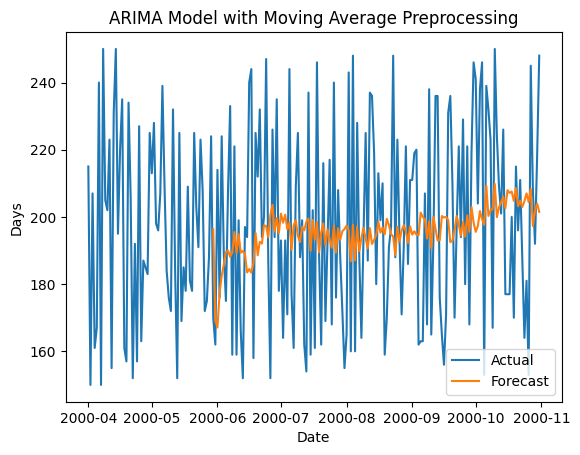

In [86]:
import matplotlib.pyplot as plt

plt.plot(df['Date'], df['Days'], label='Actual')
plt.plot(df['Date'], df['forecast'], label='Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Days')
plt.title('ARIMA Model with Moving Average Preprocessing')
plt.show()

In [88]:
len(df)

365

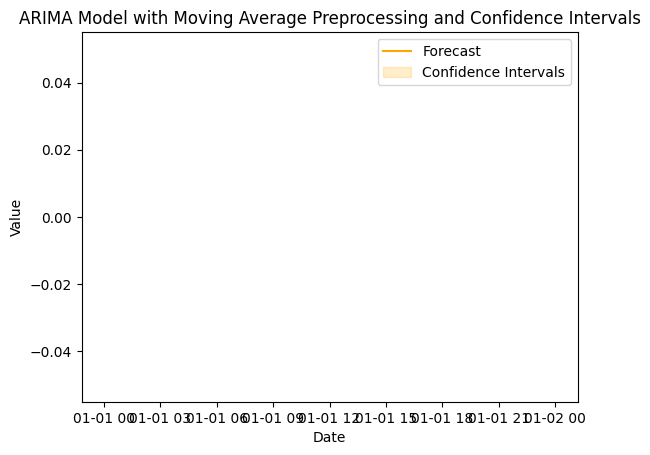

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming df is your DataFrame with 'date' and 'value' columns
df = pd.read_excel('/config/workspace/sample.xlsx')

# Convert 'date' to datetime and sort by date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Calculate the moving average with a window size of 60
df['moving_average'] = df['Days'].rolling(window=60).mean()

# Subtract the moving average from the original data
df['residuals'] = df['Days'] - df['moving_average']

# Fit ARIMA model to residuals
model = ARIMA(df['residuals'], order=(0, 0, 0))  # Adjust order as needed
results = model.fit()

# Get the forecast and confidence intervals
forecast_results = results.get_forecast(steps=len(df))
forecast_values = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()

# Add the predicted values and confidence intervals to the DataFrame
df['forecast'] = df['moving_average'] + forecast_values
df['lower_bound'] = df['moving_average'] + conf_int.iloc[:, 0]
df['upper_bound'] = df['moving_average'] + conf_int.iloc[:, 1]

# Visualize the results
plt.plot(df['Date'], df['Days'], label='Actual')
plt.plot(df['Date'], df['forecast'], label='Forecast', color='orange')
plt.fill_between(df['Date'], df['lower_bound'], df['upper_bound'], color='orange', alpha=0.2, label='Confidence Intervals')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Model with Moving Average Preprocessing and Confidence Intervals')
plt.show()


In [76]:
df

,Date,Days,moving_average,residuals,forecast,lower_bound,upper_bound
0,2000-04-01,215.0,NaN,NaN,NaN,NaN,NaN
1,2000-04-02,150.0,NaN,NaN,NaN,NaN,NaN
2,2000-04-03,207.0,NaN,NaN,NaN,NaN,NaN
3,2000-04-04,161.0,NaN,NaN,NaN,NaN,NaN
4,2000-04-05,167.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
360,2001-03-27,NaN,NaN,NaN,NaN,NaN,NaN
361,2001-03-28,NaN,NaN,NaN,NaN,NaN,NaN
362,2001-03-29,NaN,NaN,NaN,NaN,NaN,NaN
363,2001-03-30,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
df=pd.read_excel('/config/workspace/sample.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
import pandas as pd

# Assuming 'df' is your DataFrame with columns 'Date' and 'Numbers'
# Fill in missing values or gaps in the dataset
df['Days'].interpolate(inplace=True)

# Calculate Cumulative Sum
df['Cumulative_Sum'] = df['Days'].cumsum()

# Calculate Absolute Delta
df['Absolute_Delta'] = df['Days'].diff().abs()

# Calculate Moving Average with a sliding window of 60 days
df['Moving_Average'] = df['Days'].rolling(window=60).mean()

# Predict missing numbers (example: using cumulative sum)
df.loc[df['Date'] >= '2000-09-01', 'Predicted_Numbers'] = df['Cumulative_Sum'].iloc[-1] + df['Cumulative_Sum'].diff().iloc[-1]

# Fill in missing values using the predicted numbers
df['Days'].fillna(df['Predicted_Numbers'], inplace=True)

# Drop intermediate columns if needed
df = df.drop(['Cumulative_Sum', 'Absolute_Delta', 'Moving_Average', 'Predicted_Numbers'], axis=1)



In [94]:
df

,Date,Days
0,2000-04-01,215.0
1,2000-04-02,150.0
2,2000-04-03,207.0
3,2000-04-04,161.0
4,2000-04-05,167.0
...,...,...
360,2001-03-27,248.0
361,2001-03-28,248.0
362,2001-03-29,248.0
363,2001-03-30,248.0


/config/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


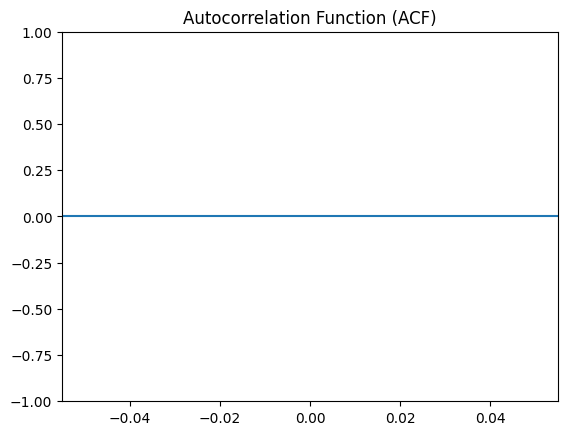

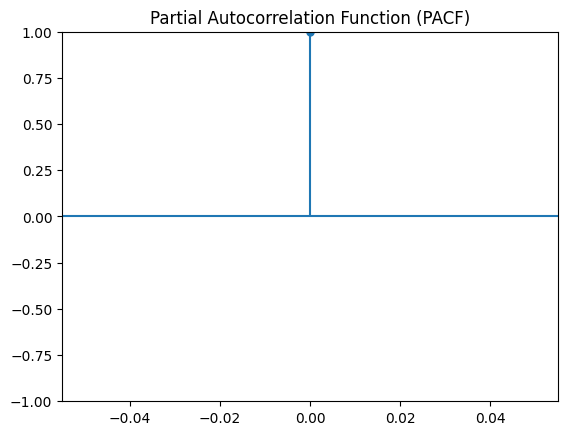

In [92]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with a column 'Value'
# Make sure the 'Value' column is in a numeric format

# Plot ACF
plot_acf(df['Days'], lags=50)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plot_pacf(df['Days'], lags=50)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


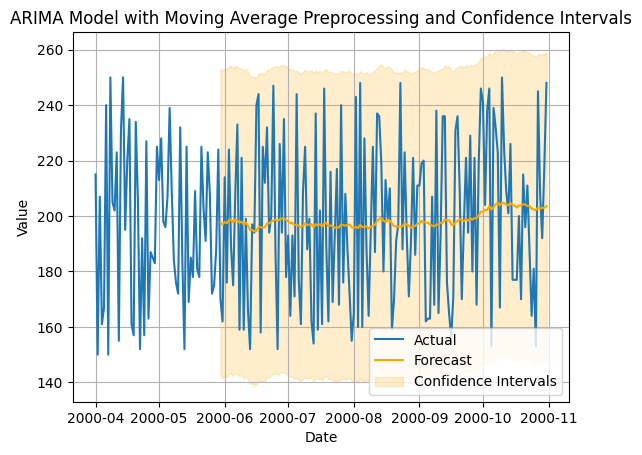

,Date,Days,moving_average,residuals,forecast,lower_bound,upper_bound
0,2000-04-01,215.0,NaN,NaN,NaN,NaN,NaN
1,2000-04-02,150.0,NaN,NaN,NaN,NaN,NaN
2,2000-04-03,207.0,NaN,NaN,NaN,NaN,NaN
3,2000-04-04,161.0,NaN,NaN,NaN,NaN,NaN
4,2000-04-05,167.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
360,2001-03-27,NaN,NaN,NaN,NaN,NaN,NaN
361,2001-03-28,NaN,NaN,NaN,NaN,NaN,NaN
362,2001-03-29,NaN,NaN,NaN,NaN,NaN,NaN
363,2001-03-30,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

def arima_forecasting(df):
    """
    Perform ARIMA forecasting on the given DataFrame.

    Parameters:
    - df: DataFrame with 'Date' and 'Days' columns.

    Returns:
    - df: Updated DataFrame with forecasted values and confidence intervals.
    """

    # Convert 'Date' to datetime and sort by date
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')

    # Calculate the moving average with a window size of 60
    df['moving_average'] = df['Days'].rolling(window=60).mean()

    # Subtract the moving average from the original data
    df['residuals'] = df['Days'] - df['moving_average']

    # Fit ARIMA model to residuals (adjust order as needed)
    model = ARIMA(df['residuals'], order=(1, 0, 1))
    results = model.fit()

    # Get the forecast and confidence intervals
    forecast_steps = len(df)
    forecast_results = results.get_forecast(steps=forecast_steps)
    forecast_values = forecast_results.predicted_mean
    conf_int = forecast_results.conf_int()

    # Add the forecasted values and confidence intervals to the DataFrame
    df['forecast'] = df['moving_average'] + forecast_values.values
    df['lower_bound'] = df['moving_average'] + conf_int.iloc[:, 0].values
    df['upper_bound'] = df['moving_average'] + conf_int.iloc[:, 1].values

    return df

# Assuming df is your DataFrame with 'Date' and 'Days' columns
df = pd.read_excel('/config/workspace/sample.xlsx')

# Perform ARIMA forecasting
df = arima_forecasting(df)

# Visualize the results
plt.plot(df['Date'], df['Days'], label='Actual')
plt.plot(df['Date'], df['forecast'], label='Forecast', color='orange')
plt.fill_between(df['Date'], df['lower_bound'], df['upper_bound'], color='orange', alpha=0.2, label='Confidence Intervals')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Model with Moving Average Preprocessing and Confidence Intervals')
plt.grid(True)
plt.show()
df

In [100]:
df

,Date,Days,moving_average,residuals,forecast,lower_bound,upper_bound
0,2000-04-01,215.0,NaN,NaN,NaN,NaN,NaN
1,2000-04-02,150.0,NaN,NaN,NaN,NaN,NaN
2,2000-04-03,207.0,NaN,NaN,NaN,NaN,NaN
3,2000-04-04,161.0,NaN,NaN,NaN,NaN,NaN
4,2000-04-05,167.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
360,2001-03-27,NaN,NaN,NaN,NaN,NaN,NaN
361,2001-03-28,NaN,NaN,NaN,NaN,NaN,NaN
362,2001-03-29,NaN,NaN,NaN,NaN,NaN,NaN
363,2001-03-30,NaN,NaN,NaN,NaN,NaN,NaN


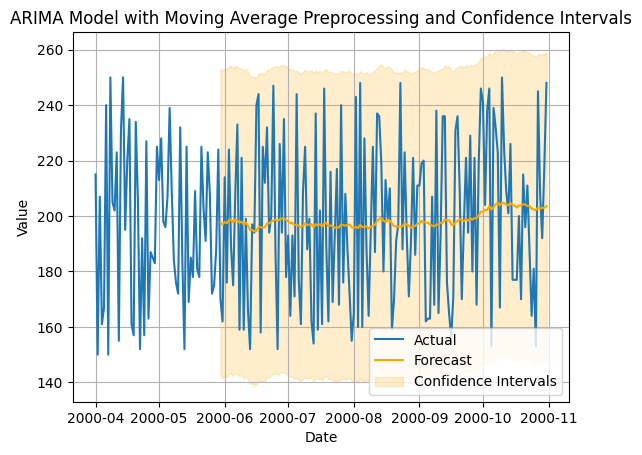

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

def arima_forecasting(df, forecast_steps):
    """
    Perform ARIMA forecasting on the given DataFrame.

    Parameters:
    - df: DataFrame with 'Date' and 'Days' columns.
    - forecast_steps: Number of steps to forecast into the future.

    Returns:
    - df: Updated DataFrame with forecasted values and confidence intervals.
    """

    # Convert 'Date' to datetime and sort by date
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')

    # Calculate the moving average with a window size of 60
    df['moving_average'] = df['Days'].rolling(window=60).mean()

    # Subtract the moving average from the original data
    df['residuals'] = df['Days'] - df['moving_average']

    # Fit ARIMA model to residuals (adjust order as needed)
    model = ARIMA(df['residuals'], order=(1, 0, 1))
    results = model.fit()

    # Get the forecast and confidence intervals
    forecast_results = results.get_forecast(steps=forecast_steps)
    forecast_values = forecast_results.predicted_mean
    conf_int = forecast_results.conf_int()

    # Add the forecasted values and confidence intervals to the DataFrame
    df['forecast'] = df['moving_average'] + forecast_values.values
    df['lower_bound'] = df['moving_average'] + conf_int.iloc[:, 0].values
    df['upper_bound'] = df['moving_average'] + conf_int.iloc[:, 1].values

    return df

# Assuming df is your DataFrame with 'Date' and 'Days' columns
df = pd.read_excel('/config/workspace/sample.xlsx')

# Number of steps to forecast into the future (adjust as needed)
forecast_steps = (pd.to_datetime('2001-03-31') - df['Date'].max()).days + 1

# Perform ARIMA forecasting
df = arima_forecasting(df, forecast_steps)

# Visualize the results
plt.plot(df['Date'], df['Days'], label='Actual')
plt.plot(df['Date'], df['forecast'], label='Forecast', color='orange')
plt.fill_between(df['Date'], df['lower_bound'], df['upper_bound'], color='orange', alpha=0.2, label='Confidence Intervals')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Model with Moving Average Preprocessing and Confidence Intervals')
plt.grid(True)
plt.show()


In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

def arima_forecasting(df, forecast_steps):
    """
    Perform ARIMA forecasting on the given DataFrame.

    Parameters:
    - df: DataFrame with 'Date' and 'Days' columns.
    - forecast_steps: Number of steps to forecast into the future.

    Returns:
    - df: Updated DataFrame with forecasted values and confidence intervals.
    """

    # Convert 'Date' to datetime and sort by date
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')

    # Calculate the moving average with a window size of 60
    df['moving_average'] = df['Days'].rolling(window=60).mean()

    # Subtract the moving average from the original data
    df['residuals'] = df['Days'] - df['moving_average']

    # Fit ARIMA model to residuals (adjust order as needed)
    model = ARIMA(df['residuals'], order=(1, 0, 1))
    results = model.fit()

    # Get the forecast and confidence intervals
    forecast_results = results.get_forecast(steps=len(df) + forecast_steps)
    forecast_values = forecast_results.predicted_mean
    conf_int = forecast_results.conf_int()

    # Add the forecasted values and confidence intervals to the DataFrame
    df['forecast'] = df['moving_average'] + forecast_values.values
    df['lower_bound'] = df['moving_average'] + conf_int.iloc[:, 0].values
    df['upper_bound'] = df['moving_average'] + conf_int.iloc[:, 1].values

    return df

# Assuming df is your DataFrame with 'Date' and 'Days' columns
df = pd.read_excel('/config/workspace/sample.xlsx')

# Number of steps to forecast into the future (adjust as needed)
forecast_steps = (pd.to_datetime('2001-03-31') - pd.to_datetime('2001-11-01')).days

# Perform ARIMA forecasting
df = arima_forecasting(df, forecast_steps)

# Visualize the results
plt.plot(df['Date'], df['Days'], label='Actual')
plt.plot(df['Date'], df['forecast'], label='Forecast', color='orange')
plt.fill_between(df['Date'], df['lower_bound'], df['upper_bound'], color='orange', alpha=0.2, label='Confidence Intervals')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Model with Moving Average Preprocessing and Confidence Intervals')
plt.grid(True)
plt.show()


ValueError: operands could not be broadcast together with shapes (365,) (150,) 

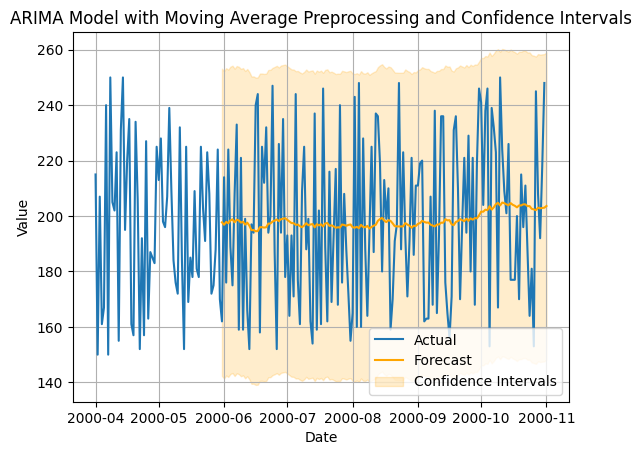

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

def arima_forecasting(df, forecast_steps):
    """
    Perform ARIMA forecasting on the given DataFrame.

    Parameters:
    - df: DataFrame with 'Date' and 'Days' columns.
    - forecast_steps: Number of steps to forecast into the future.

    Returns:
    - df: Updated DataFrame with forecasted values and confidence intervals.
    """

    # Convert 'Date' to datetime and sort by date
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')

    # Calculate the moving average with a window size of 60
    df['moving_average'] = df['Days'].rolling(window=60).mean()

    # Subtract the moving average from the original data
    df['residuals'] = df['Days'] - df['moving_average']

    # Fit ARIMA model to residuals (adjust order as needed)
    model = ARIMA(df['residuals'], order=(1, 0, 1))
    results = model.fit()

    # Get the forecast and confidence intervals
    forecast_start_date = df['Date'].max()
    forecast_end_date = pd.to_datetime('2001-03-31')
    forecast_results = results.get_forecast(steps=(forecast_end_date - forecast_start_date).days + 1)
    forecast_values = forecast_results.predicted_mean
    conf_int = forecast_results.conf_int()

    # Add the forecasted values and confidence intervals to the DataFrame
    df['forecast'] = df['moving_average'].shift(1) + forecast_values.values
    df['lower_bound'] = df['moving_average'].shift(1) + conf_int.iloc[:, 0].values
    df['upper_bound'] = df['moving_average'].shift(1) + conf_int.iloc[:, 1].values

    return df

# Assuming df is your DataFrame with 'Date' and 'Days' columns
df = pd.read_excel('/config/workspace/sample.xlsx')

# Number of steps to forecast into the future (adjust as needed)
forecast_steps = (pd.to_datetime('2001-03-31') - pd.to_datetime('2001-11-01')).days

# Perform ARIMA forecasting
df = arima_forecasting(df, forecast_steps)

# Visualize the results
plt.plot(df['Date'], df['Days'], label='Actual')
plt.plot(df['Date'], df['forecast'], label='Forecast', color='orange')
plt.fill_between(df['Date'], df['lower_bound'], df['upper_bound'], color='orange', alpha=0.2, label='Confidence Intervals')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Model with Moving Average Preprocessing and Confidence Intervals')
plt.grid(True)
plt.show()


In [18]:
import pandas as pd

In [19]:
pip install openpyxl


9600.16s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd

# Load your dataset
df = pd.read_excel('sample.xlsx')

# Rename columns to 'ds' and 'y'
df.columns = ['ds', 'y']

# Convert 'ds' to datetime format
df['ds'] = pd.to_datetime(df['ds'])

# Subset the data for the available period (April 1, 2000, to October 31, 2000)
available_data = df[df['ds'] <= '2000-10-31']

In [25]:
pip install pystan

9796.82s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [27]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [26]:
from fbprophet import Prophet
model =Prophet()
model.fit(available_data)

# Make future dataframe
future = model.make_future_dataframe(periods=5)  # 152 days from Nov 1, 2000, to Mar 31, 2001

# Predict
forecast = model.predict(future)

# Plot the forecast with prediction intervals
fig = model.plot(forecast, xlabel='Date', ylabel='Number of Days', figsize=(10, 6))

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  ERROR: Command errored out with exit status 1:
   command: /bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-2dlp4k6f/fbprophet/setup.py'"'"'; __file__='"'"'/tmp/pip-install-2dlp4k6f/fbprophet/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-v_jqpyf1
       cwd: /tmp/pip-install-2dlp4k6f/fbprophet/
  Complete output (46 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib
  creating build/lib/fbprophet
  creating build/lib/fbprophet/stan_model
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "/tmp/pip-install-2dlp4k6f/fbprophet/setup.py", line 122, in <module>
      setup(
    File "/usr/lib/python3/dist-packages/setuptools/__init__.py", line 144, in setup
    

In [ ]:
fbprophet --version


NameError: name 'fbprophet' is not defined